In [6]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

Quantile-quantile plots, or QQ-plots, are used to check whether distributions are well-approximated by a normal distribution.

Given a proportion  **p** , the quantile  **q**  is the value such that the proportion of values in the data below  **q**  is  **p** .

If **x** is the <b>q<sup>th</sup></b> quantile, then **q** % values in the data will smaller than **x**

Given **data** and a value **x**,  the quantile **q** of **x** is: `q =  P(value <= x) = CDF(x)` or `q = CDF(x)`

Given **data** and **q** quantile, the value of **x** is: <code>x = CDF<sup>-1</sup>(q)</code>

# Let's build a quantile-quantile plot from scratch

First, let's generate some data

In [1]:
data <- rnorm(100, mean = 10, sd = 3) 

Let's determine whether **`data`** can be well-approximated by a normal distribution

1.Assuming that **`data`** CAN be well-approximated by a normal distribution. Let's caculate the value **x** for each **q** 
quantile by using: <code>x = CDF<sup>-1</sup>(q)</code>

In [2]:
m <- mean(data)                                 #The mean of sample
s <- sd(data)                                   #The standard deviation of sample
q <- seq(0, 1, length.out = 100)                #generate a range of q
theoretical_x <- qnorm(q, mean = m, sd = s)    #inverse CDF of a normal distribution with mean = m, std = s

2. Let's calculate the quantile of observed **`data`** by the definition:  
If **x** is the **qth** quantile, then **q** % values in the data will smaller than **x**

In [3]:
observed_x <- quantile(data, q)

3. If **`data`** can be well-approximated by a normal distribution, then we expect: **`theoretical_x`** ~ **`observed_x`**

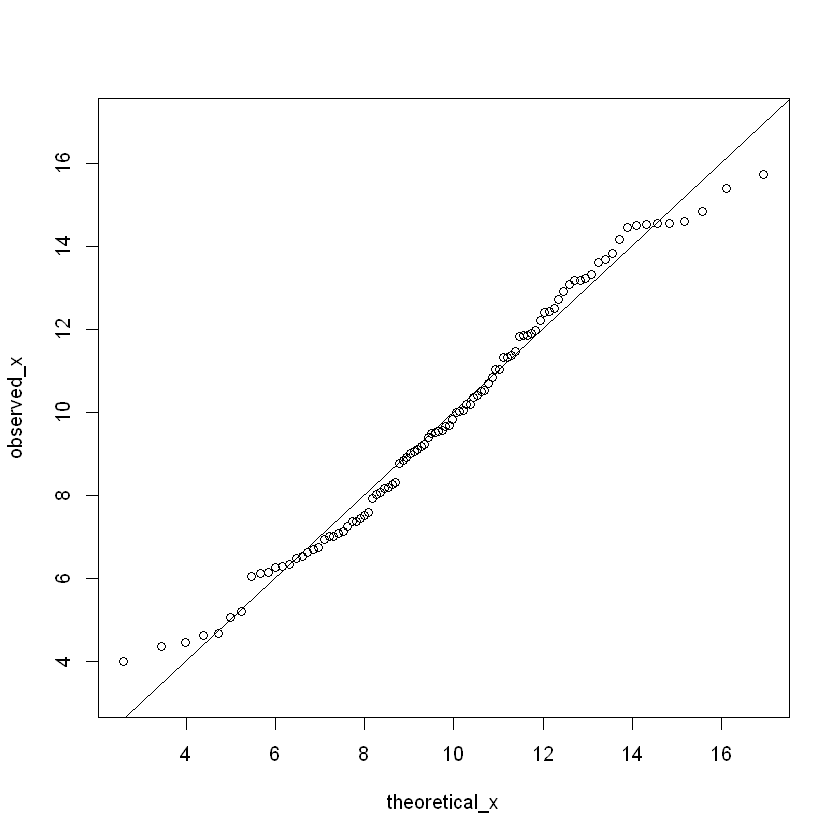

In [4]:
plot(theoretical_x, observed_x)
abline(0, 1)

We can see that each point is approximately on the same line, it means **`observed_x`** is approximately equal to  **`theoretical_x`**

# Using ggplot2

By default, the data are compared to a standard normal distribution with a mean of 0 and standard deviation of 1. This can be changed with the **`dparams`** arguments, or the sample data can be scaled.

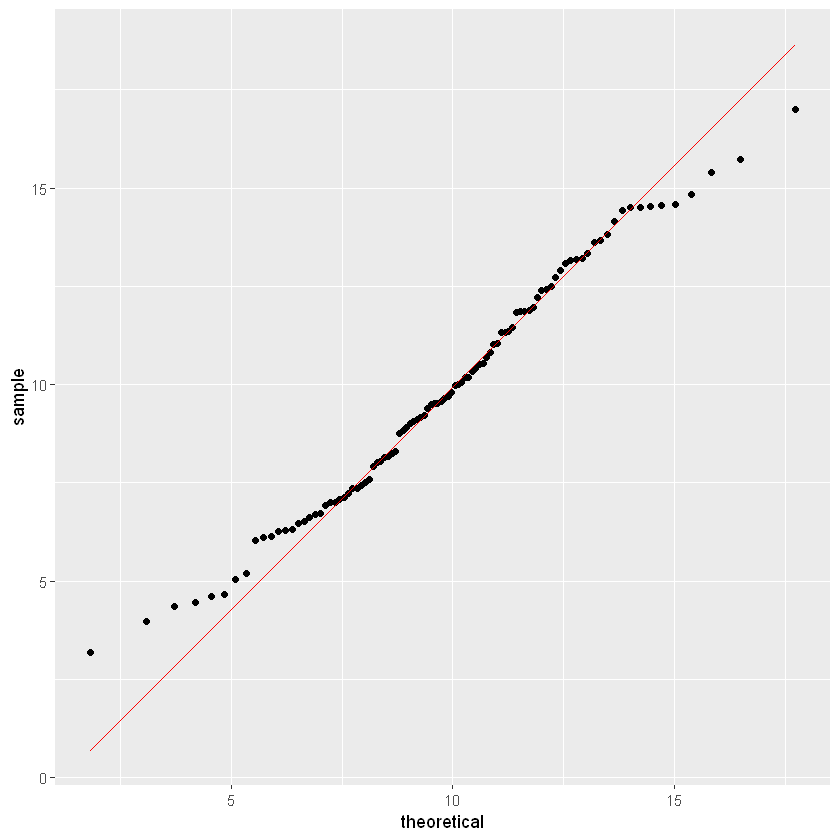

In [14]:
values <- data.frame(y = data)
params <- c(mean = m, sd = s)
ggplot(values, aes(sample = y)) + 
#plot points
geom_qq(dparams = params) +
#point line
geom_qq_line(color = 'red', dparams = params)

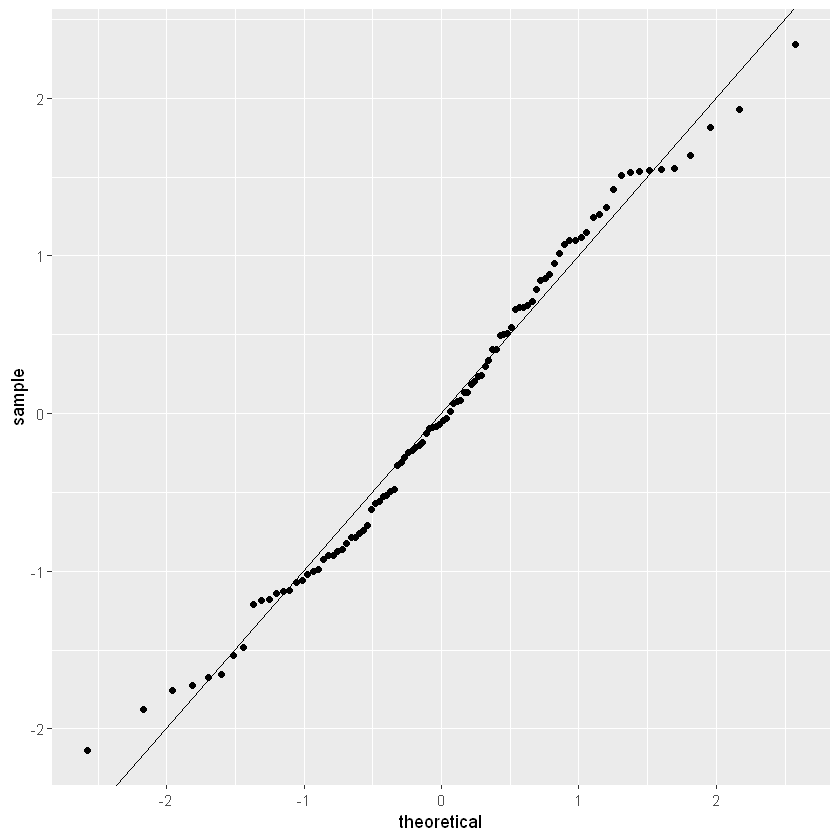

In [15]:
#scale data
ggplot(values, aes(sample = scale(y))) + 
geom_qq() + 
geom_abline()